# Spam Recognition

The SMS Spam Collection is a set of SMS tagged messages that have been collected for
SMS Spam research. It contains one set of SMS messages in English of 5,574 messages,
tagged acording being ham (legitimate) or spam.

<b> Goal : Compare performance of ML models </b>

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from string import punctuation
from sklearn.utils import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import re
sn.set()

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load the Dataset

In [3]:
!gdown -q 1gU5LpNVzIesIDPP8vHVqDKRX0btb9fNb


In [4]:
dataset = pd.read_csv("Spam_Sms_DataSet.txt", sep='\t')
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Functions

In [5]:
def clean_text(text):
    for punc in list (punctuation):
        text = text.lower().replace(punc," ")
    text = re.sub('\d+\.\d+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(' +', ' ', ' '.join([word for word in text.split() if word not in list(stopwords.words('english'))]))
    return text

def count_words(text):
    return len(text.split())

def count_chars(text):
    return len(list(text))

def generate_class_weight(label):
  class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(label),
                                        y = label)
  return dict(zip(np.unique(label), class_weights))


def plot_confusion_matrix(confusion_matrix, title='', cmap ='Purples'):
    df = pd.DataFrame(confusion_matrix, range(len(confusion_matrix)), range(len(confusion_matrix)))
    plt.figure(figsize=(7,5))
    if title == '' :
        plt.title('Confusion Matrix')
    else:
        plt.title('Confusion Matrix for' + ' ' + title)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df, annot=True, annot_kws={"size": 12},fmt='.0f',cmap=cmap) # font size
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

def evaluate(y_true, y_pred, title=''):
  plot_confusion_matrix(confusion_matrix(y_true, y_pred), title=title)
  print('----------------------------------')
  print(classification_report(y_true, y_pred))

#### Count Number of Words & Character in each message

In [6]:
dataset["label"] = dataset["label"].map({'ham':0,"spam":1})
dataset['Number of Words'] = dataset.message.apply(count_words)
dataset['Number of Character'] = dataset.message.apply(count_chars)
dataset['message'] = dataset.message.apply(clean_text)

In [7]:
dataset

,label,message,Number of Words,Number of Character
0,0,go jurong point crazy available bugis n great ...,20,111
1,0,ok lar joking wif u oni,6,29
2,1,free entry wkly comp win fa cup final tkts st ...,28,155
3,0,u dun say early hor u c already say,11,49
4,0,nah think goes usf lives around though,13,61
...,...,...,...,...
5567,1,nd time tried contact u u £ pound prize claim ...,30,160
5568,0,ü b going esplanade fr home,8,36
5569,0,pity mood suggestions,10,57
5570,0,guy bitching acted like interested buying some...,26,125


#### Words Count : Ham vs Spam

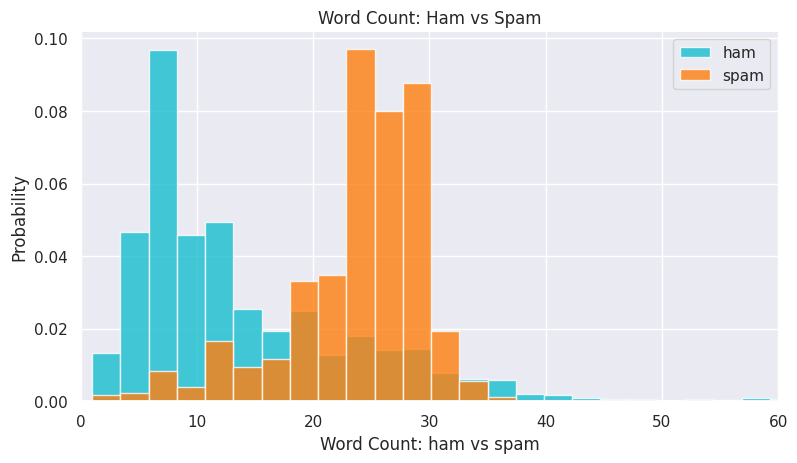

In [8]:
fig = plt.figure(figsize=(9,12))
ax1 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((dataset.loc[dataset.label==0]['Number of Words'], dataset.loc[dataset.label==1]['Number of Words'])), bins=70)[1]
plt.hist(dataset.loc[dataset.label==0]['Number of Words'], bins, density=True, color='#17becf', alpha=0.8, label='ham')
plt.hist(dataset.loc[dataset.label==1]['Number of Words'], bins, density=True, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 60)
plt.xlabel('Word Count: ham vs spam')
plt.ylabel('Probability')
plt.title('Word Count: Ham vs Spam')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.5)

#### Characters Count : Ham vs Spam

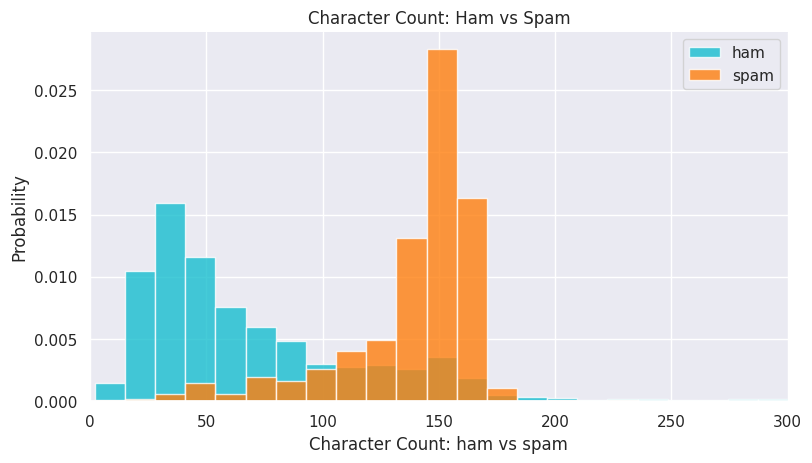

In [9]:
fig = plt.figure(figsize=(9,12))
ax2 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((dataset.loc[dataset.label==0]["Number of Character"], dataset.loc[dataset.label== 1]["Number of Character"])), bins=70)[1]
plt.hist(dataset.loc[dataset.label== 0]["Number of Character"], bins, density=True, color='#17becf', alpha=0.8, label='ham')
plt.hist(dataset.loc[dataset.label== 1]["Number of Character"], bins, density=True, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 300)
plt.xlabel('Character Count: ham vs spam')
plt.ylabel('Probability')
plt.title('Character Count: Ham vs Spam')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.5)

#### Specify Features & Target

In [10]:
features = dataset[['message', "Number of Words", "Number of Character"]]
y = dataset['label']

#### Split the Dataset to Train & Test Dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=True, stratify=y)
class_weight = generate_class_weight(y_train)


In [12]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'class_weight: {class_weight}')

X_train shape: (4457, 3)
y_train shape: (4457,)
X_test shape: (1115, 3)
y_test shape: (1115,)
class_weight: {0: 0.577481212749417, 1: 3.7265886287625416}


### Normalization of structural features

In [13]:
scaler = StandardScaler()
X_train_structural = scaler.fit_transform(X_train[["Number of Words", "Number of Character"]].to_numpy())
X_test_structural = scaler.transform(X_test[["Number of Words", "Number of Character"]].to_numpy())

### TF-IDF vector as feature

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['message'].to_numpy()).toarray()
X_test_tfidf = vectorizer.transform(X_test['message'].to_numpy()).toarray()

## Experiments

### Logistic Regression

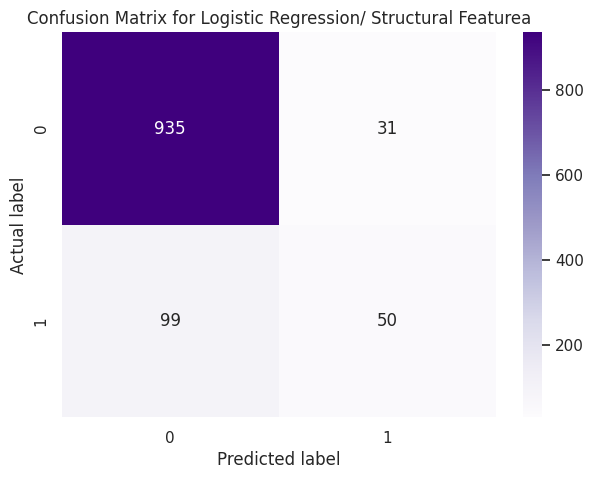

----------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       966
           1       0.62      0.34      0.43       149

    accuracy                           0.88      1115
   macro avg       0.76      0.65      0.68      1115
weighted avg       0.87      0.88      0.87      1115



In [15]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression().fit(X_train_structural, y_train)
predictions = logistic_clf.predict(X_test_structural)
evaluate(y_test, predictions, title='Logistic Regression/ Structural Featurea')

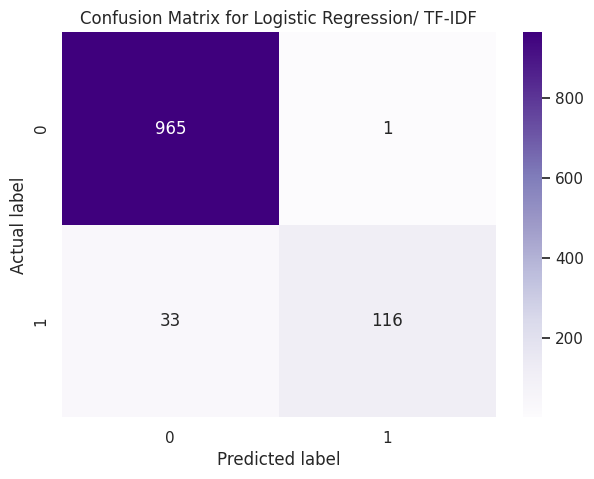

----------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.78      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [16]:
logistic_clf = LogisticRegression().fit(X_train_tfidf, y_train)
predictions = logistic_clf.predict(X_test_tfidf)
evaluate(y_test, predictions, title='Logistic Regression/ TF-IDF')

### Decision Tree

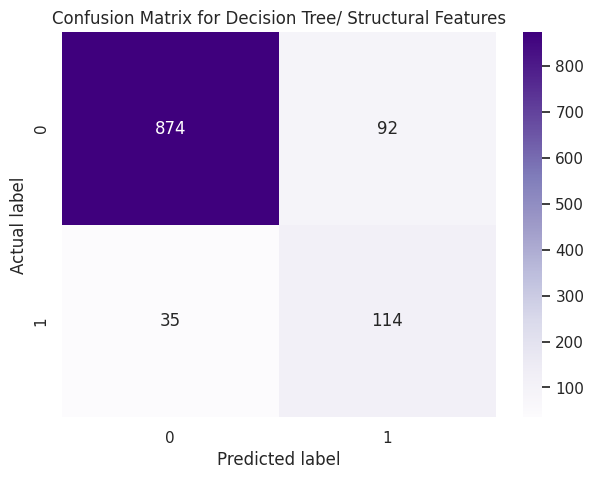

----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       966
           1       0.55      0.77      0.64       149

    accuracy                           0.89      1115
   macro avg       0.76      0.83      0.79      1115
weighted avg       0.91      0.89      0.89      1115



In [17]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier(random_state=0, class_weight='balanced').fit(X_train_structural, y_train)
predictions = decision_tree_clf.predict(X_test_structural)
evaluate(y_test, predictions, title='Decision Tree/ Structural Features')

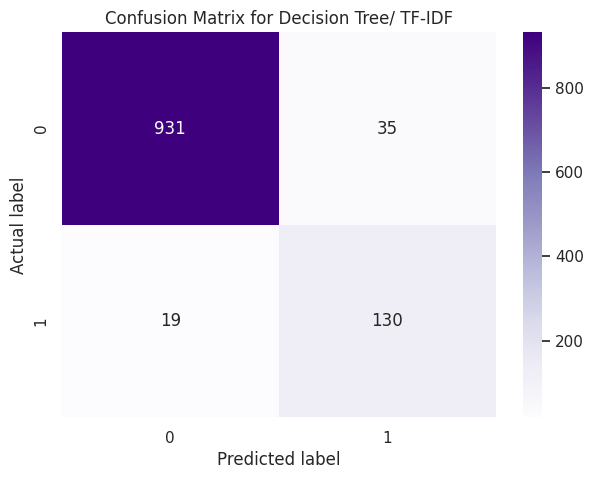

----------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       966
           1       0.79      0.87      0.83       149

    accuracy                           0.95      1115
   macro avg       0.88      0.92      0.90      1115
weighted avg       0.95      0.95      0.95      1115



In [18]:
decision_tree_clf = DecisionTreeClassifier(random_state=0, class_weight='balanced').fit(X_train_tfidf, y_train)
predictions = decision_tree_clf.predict(X_test_tfidf)
evaluate(y_test, predictions, title='Decision Tree/ TF-IDF')

Random Forest

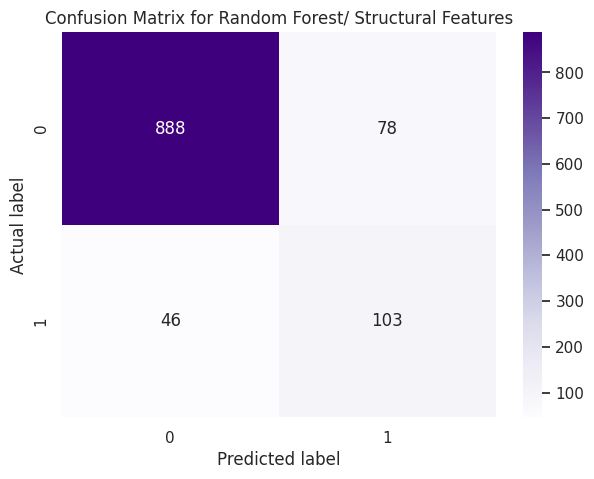

----------------------------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       966
           1       0.57      0.69      0.62       149

    accuracy                           0.89      1115
   macro avg       0.76      0.81      0.78      1115
weighted avg       0.90      0.89      0.89      1115



In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(random_state=0, class_weight='balanced').fit(X_train_structural, y_train)
predictions = random_forest_clf.predict(X_test_structural)
evaluate(y_test, predictions, title='Random Forest/ Structural Features')

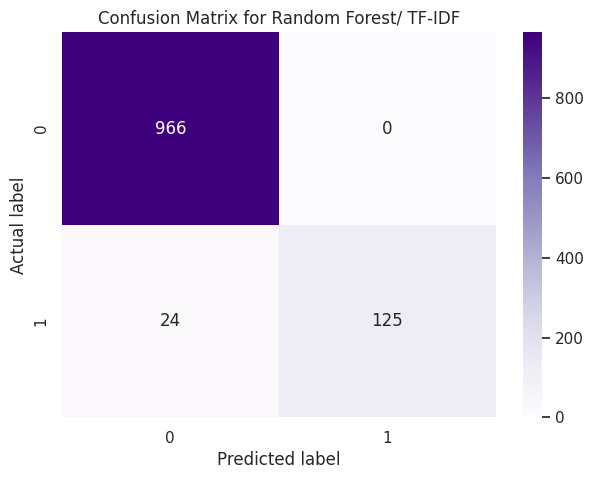

----------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(random_state=0, class_weight='balanced').fit(X_train_tfidf, y_train)
predictions = random_forest_clf.predict(X_test_tfidf)
evaluate(y_test, predictions, title='Random Forest/ TF-IDF')

### Multi Layer Perceptron

In [21]:
import tensorflow as tf
from tensorflow import keras

METRICS = [
      keras.metrics.TruePositives(name='TP'),
      keras.metrics.FalsePositives(name='FP'),
      keras.metrics.TrueNegatives(name='TN'),
      keras.metrics.FalseNegatives(name='FN'),
      keras.metrics.BinaryAccuracy(name='Accuracy'),
      keras.metrics.Precision(name='Precision'),
      keras.metrics.Recall(name='Recall'),
      keras.metrics.AUC(name='AUC'),
      keras.metrics.AUC(name='PRC', curve='PR')
]



In [22]:
def build_mlp(input_size, hidden_layer_size, output_size):
  input = keras.layers.Input((input_size))
  x = keras.layers.Dense(hidden_layer_size, activation='relu')(input)
  x = keras.layers.Dense(hidden_layer_size//2, activation='relu')(x)
  x = keras.layers.Dense(hidden_layer_size//4, activation='relu')(x)
  output = keras.layers.Dense(output_size, activation='sigmoid')(x)
  model = keras.Model(inputs=input, outputs=output)
  return model


def train_deep_model(model, X_train, y_train, class_weight, epochs=50, batch_size=64, learning_rate=0.001):

  print('----------------------------------')
  print(model.summary())
  print('----------------------------------')

  model.compile(optimizer = tf.optimizers.Adam(learning_rate=learning_rate),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=METRICS)

  history = model.fit(X_train,
                      y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      shuffle = True,
                      class_weight = class_weight,
                      verbose = 1)
  return history

----------------------------------
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10753 (42.00 KB)
Trainable params: 10753 (42.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________

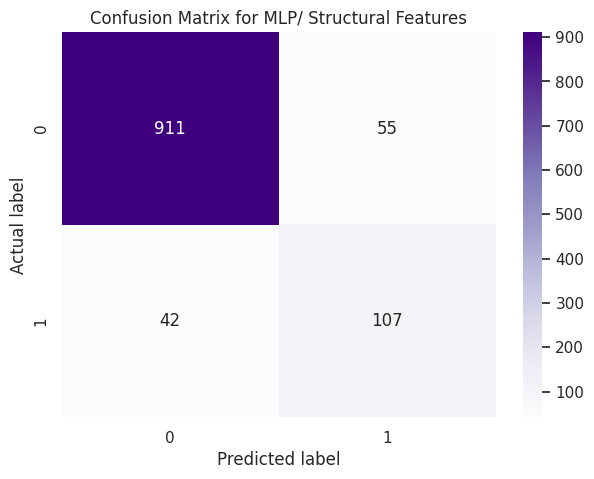

----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       966
           1       0.66      0.72      0.69       149

    accuracy                           0.91      1115
   macro avg       0.81      0.83      0.82      1115
weighted avg       0.92      0.91      0.91      1115



In [23]:
mlp_model = build_mlp(input_size=X_train_structural.shape[1], hidden_layer_size=128, output_size=1)
_ = train_deep_model(mlp_model, X_train_structural, y_train, class_weight)
predictions = mlp_model.predict(X_test_structural)
predictions = np.where(predictions >= 0.8, 1, 0)
evaluate(y_test, predictions, title='MLP/ Structural Features')

----------------------------------
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6806)]            0         
                                                                 
 dense_8 (Dense)             (None, 128)               871296    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 881665 (3.36 MB)
Trainable params: 881665 (3.36 MB)
Non-trainable params: 0 (0.00 Byte)
______________________________________________________

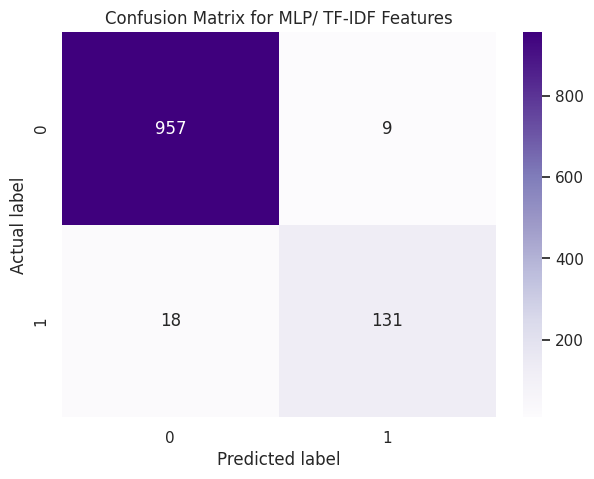

----------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.94      0.88      0.91       149

    accuracy                           0.98      1115
   macro avg       0.96      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [26]:
mlp_model = build_mlp(input_size=X_train_tfidf.shape[1], hidden_layer_size=128, output_size=1)
_ = train_deep_model(mlp_model, X_train_tfidf, y_train, class_weight, epochs=10)
predictions = mlp_model.predict(X_test_tfidf)
predictions = np.where(predictions >= 0.5, 1, 0)
evaluate(y_test, predictions, title='MLP/ TF-IDF Features')

## Conclusion

### Structural Features

In [36]:
conclusion = pd.DataFrame([['Logistic Regression',0.62, 0.34, 0.43],
              ['Decision Tree', 0.55, 0.77, 0.64],
              ['Random Forest',0.57, 0.69, 0.62],
              ['MLP', 0.66, 0.72, 0.69]],
              columns=["Model","Precision","Recall","F1-Score"])
conclusion = conclusion.set_index('Model')
conclusion.style.background_gradient(cmap="YlGn")

,Precision,Recall,F1-Score
Model,,,
Logistic Regression,0.620000,0.340000,0.430000
Decision Tree,0.550000,0.770000,0.640000
Random Forest,0.570000,0.690000,0.620000
MLP,0.660000,0.720000,0.690000


### TF-IDF

In [37]:
conclusion = pd.DataFrame([['Logistic Regression', 0.99, 0.78, 0.87],
              ['Decision Tree', 0.79, 0.87, 0.83],
              ['Random Forest', 1.00, 0.84, 0.91],
              ['MLP', 0.94, 0.88, 0.91]],
              columns=["Model","Precision","Recall","F1-Score"])
conclusion = conclusion.set_index('Model')
conclusion.style.background_gradient(cmap="YlGn")

,Precision,Recall,F1-Score
Model,,,
Logistic Regression,0.990000,0.780000,0.870000
Decision Tree,0.790000,0.870000,0.830000
Random Forest,1.000000,0.840000,0.910000
MLP,0.940000,0.880000,0.910000
